In [3]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from networkx.algorithms.community import label_propagation_communities, modularity

df = pd.read_csv("london.csv")

pivot = df.pivot_table(
    index="borough",
    columns="major_category",
    values="value",
    aggfunc="sum",
    fill_value=0
)

X = normalize(pivot.values)
sim = cosine_similarity(X)
nodes = pivot.index.to_list()

k = 5
G = nx.Graph()

for i in range(len(nodes)):
    idx = np.argsort(sim[i])[-(k + 1):-1]
    for j in idx:
        G.add_edge(nodes[i], nodes[j], weight=sim[i, j])

communities = list(label_propagation_communities(G))
mod = modularity(G, communities, weight="weight")

print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())
print("Communities:", len(communities))
print("Modularity:", mod)

for i, c in enumerate(communities):
    print(f"Community {i}:", sorted(c))


Nodes: 33
Edges: 109
Communities: 2
Modularity: 0.16581019021059218
Community 0: ['Barking and Dagenham', 'Bexley', 'Brent', 'Croydon', 'Greenwich', 'Lewisham']
Community 1: ['Barnet', 'Bromley', 'Camden', 'City of London', 'Ealing', 'Enfield', 'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster']


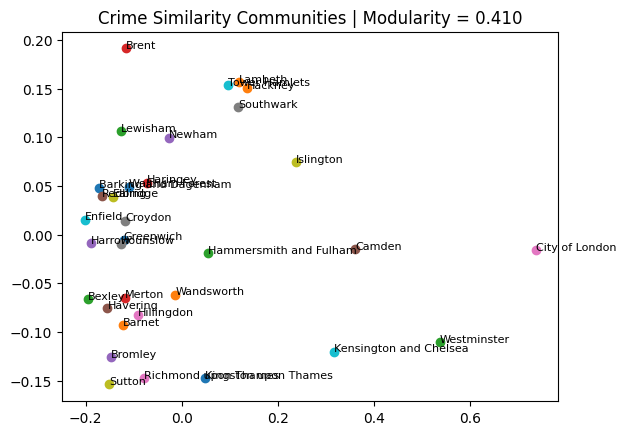

Communities: 3
Modularity: 0.41037281314057106
Community 0: ['Barking and Dagenham', 'Bexley', 'Bromley', 'Croydon', 'Greenwich', 'Havering', 'Hillingdon', 'Hounslow', 'Kingston upon Thames', 'Lewisham', 'Merton', 'Richmond upon Thames', 'Sutton', 'Wandsworth']
Community 1: ['Barnet', 'Brent', 'Ealing', 'Enfield', 'Haringey', 'Harrow', 'Newham', 'Redbridge', 'Waltham Forest']
Community 2: ['Camden', 'City of London', 'Hackney', 'Hammersmith and Fulham', 'Islington', 'Kensington and Chelsea', 'Lambeth', 'Southwark', 'Tower Hamlets', 'Westminster']


In [4]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from networkx.algorithms.community import label_propagation_communities, modularity

df = pd.read_csv("london.csv")

df["crime"] = df["major_category"] + " | " + df["minor_category"]

pivot = df.pivot_table(
    index="borough",
    columns="crime",
    values="value",
    aggfunc="sum",
    fill_value=0
)

X = normalize(pivot.values)
sim = cosine_similarity(X)
nodes = pivot.index.to_list()

k = 6
G = nx.Graph()

for i in range(len(nodes)):
    idx = np.argsort(sim[i])[-(k + 1):-1]
    for j in idx:
        G.add_edge(nodes[i], nodes[j], weight=sim[i, j])

communities = list(label_propagation_communities(G))
mod = modularity(G, communities, weight="weight")

node_community = {}
for i, c in enumerate(communities):
    for n in c:
        node_community[n] = i

coords = PCA(n_components=2).fit_transform(X)

plt.figure()
for i, node in enumerate(nodes):
    plt.scatter(
        coords[i, 0],
        coords[i, 1]
    )
    plt.text(
        coords[i, 0],
        coords[i, 1],
        node,
        fontsize=8
    )

plt.title(f"Crime Similarity Communities | Modularity = {mod:.3f}")
plt.show()

print("Communities:", len(communities))
print("Modularity:", mod)

for i, c in enumerate(communities):
    print(f"Community {i}:", sorted(c))
